In [1]:
#setup
import pandas as pd
import researchpy as rp
from scipy.stats.stats import pearsonr

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Mirjam\AppData\Local\Temp\ipykernel_9120\4165315372.py:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
data = pd.read_csv('2020studentdata.csv')

#create some smaller datasets to check some hypothesis later
just_on_track = data[data['on_track'] == 1]
just_on_track = just_on_track.drop(columns=['on_track'])
just_men = data[data['GENDERMALE'] == 1]
just_men = just_men.drop(columns=['GENDERMALE'])
extended_exam = data[data['exam_type'] == 'extended']

In [21]:
round(data.describe(include='all'),2)

,fall GPA,spring GPA,GENDERMALE,age,math_exam,se_score,bl_score,on_track,exam_type
count,135.00,135.00,135.00,135.00,132.00,135.00,135.00,135.00,132
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,extended
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
mean,3.42,2.84,0.73,20.89,75.54,11.42,18.70,0.77,NaN
std,1.06,1.54,0.45,3.42,20.11,1.91,3.54,0.42,NaN
min,0.50,0.00,0.00,18.00,6.00,5.00,9.00,0.00,NaN
25%,2.60,2.00,0.00,19.00,65.75,10.00,17.00,1.00,NaN
50%,3.60,3.00,1.00,20.00,80.50,12.00,19.00,1.00,NaN
75%,4.20,4.22,1.00,21.00,90.00,13.00,21.00,1.00,NaN


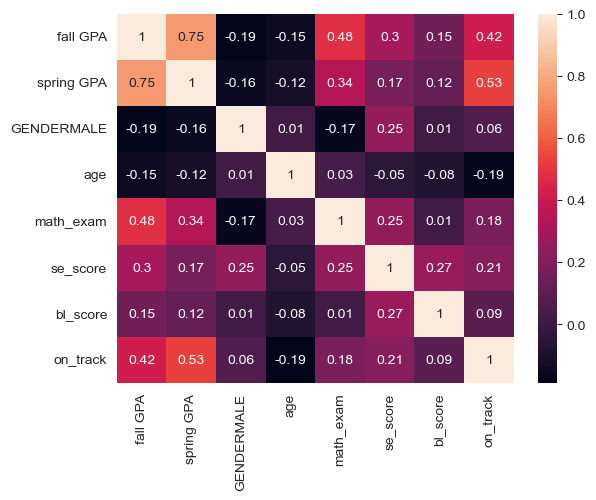

In [4]:
cormat = data.corr()
cormat = round(cormat,2)
sns.heatmap(cormat, annot = True); #correlation matrix with just the students that took the extended math exam
plt.show()
plt.close()

In [22]:
#a simple correlation matrix for reporting
cormat

,fall GPA,spring GPA,GENDERMALE,age,math_exam,se_score,bl_score,on_track
fall GPA,1.00,0.75,-0.19,-0.15,0.48,0.30,0.15,0.42
spring GPA,0.75,1.00,-0.16,-0.12,0.34,0.17,0.12,0.53
GENDERMALE,-0.19,-0.16,1.00,0.01,-0.17,0.25,0.01,0.06
age,-0.15,-0.12,0.01,1.00,0.03,-0.05,-0.08,-0.19
math_exam,0.48,0.34,-0.17,0.03,1.00,0.25,0.01,0.18
se_score,0.30,0.17,0.25,-0.05,0.25,1.00,0.27,0.21
bl_score,0.15,0.12,0.01,-0.08,0.01,0.27,1.00,0.09
on_track,0.42,0.53,0.06,-0.19,0.18,0.21,0.09,1.00


In [41]:
complete_data = data.dropna(axis=0)
complete_data.columns

Index(['fall GPA', 'spring GPA', 'GENDERMALE', 'age', 'math_exam', 'se_score',
       'bl_score', 'on_track', 'exam_type'],
      dtype='object')

In [71]:
m = []
#m.append(complete_data.columns[:-1])
for c1 in complete_data.columns[:-1]:
    row = []
    row.append(c1)
    for c2 in complete_data.columns[:-1]:
        #print(c1)
        #print(c2)
        #print(pearsonr(complete_data[c1], complete_data[c2]))
        p = pearsonr(complete_data[c1], complete_data[c2]).pvalue
        if p < 0.05: #if p value is below 0.05 threshold
            row.append(round(p,2))
        else:
            row.append('meh') #not significant
    m.append(row)

In [72]:
np.stack(m, axis=1)

array([['fall GPA', 'spring GPA', 'GENDERMALE', 'age', 'math_exam',
        'se_score', 'bl_score', 'on_track'],
       ['0.0', '0.0', '0.02', 'meh', '0.0', '0.0', 'meh', '0.0'],
       ['0.0', '0.0', 'meh', 'meh', '0.0', '0.04', 'meh', '0.0'],
       ['0.02', 'meh', '0.0', 'meh', '0.05', '0.0', 'meh', 'meh'],
       ['meh', 'meh', 'meh', '0.0', 'meh', 'meh', 'meh', '0.03'],
       ['0.0', '0.0', '0.05', 'meh', '0.0', '0.0', 'meh', '0.04'],
       ['0.0', '0.04', '0.0', 'meh', '0.0', '0.0', '0.0', '0.01'],
       ['meh', 'meh', 'meh', 'meh', 'meh', '0.0', '0.0', 'meh'],
       ['0.0', '0.0', 'meh', '0.03', '0.04', '0.01', 'meh', '0.0']],
      dtype='<U32')

# Statistical tests for comparing groups
Here we present the summaries and results of t-tests comparing male and female students. Only the statistically significant differences are presented.
There is a statistically significant difference between male and female students in the following variables:
1. First semester GPA (women have higher grades)
2. Math exam (women have higher scores)
3. Self-efficacy (men have higher scores)

In [73]:
summary, results = rp.ttest(group1= data['fall GPA'][data['GENDERMALE'] == 1], group1_name= "Male",
                            group2= data['fall GPA'][data['GENDERMALE'] == 0], group2_name= "Female")
print(summary)
print(results)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0      Male   98.0  3.290306  1.109900  0.112117   3.067785  3.512827
1    Female   37.0  3.747297  0.852769  0.140194   3.462970  4.031625
2  combined  135.0  3.415556  1.062527  0.091448   3.234688  3.596423
              Independent t-test   results
0  Difference (Male - Female) =    -0.4570
1          Degrees of freedom =   133.0000
2                           t =    -2.2630
3       Two side test p value =     0.0253
4      Difference < 0 p value =     0.0126
5      Difference > 0 p value =     0.9874
6                   Cohen's d =    -0.4367
7                   Hedge's g =    -0.4342
8              Glass's delta1 =    -0.4117
9            Point-Biserial r =    -0.1926


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [74]:
summary, results = rp.ttest(group1= data['math_exam'][data['GENDERMALE'] == 1], group1_name= "Male",
                            group2= data['math_exam'][data['GENDERMALE'] == 0], group2_name= "Female")
print(summary)
print(results)

   Variable      N       Mean         SD        SE  95% Conf.   Interval
0      Male   95.0  73.389474  21.079028  2.162663  69.095456  77.683491
1    Female   37.0  81.054054  16.382487  2.693264  75.591861  86.516247
2  combined  132.0  75.537879  20.112814  1.750596  72.074783  79.000975
              Independent t-test   results
0  Difference (Male - Female) =    -7.6646
1          Degrees of freedom =   130.0000
2                           t =    -1.9885
3       Two side test p value =     0.0489
4      Difference < 0 p value =     0.0244
5      Difference > 0 p value =     0.9756
6                   Cohen's d =    -0.3854
7                   Hedge's g =    -0.3831
8              Glass's delta1 =    -0.3636
9            Point-Biserial r =    -0.1718


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [75]:
summary, results = rp.ttest(group1= data['se_score'][data['GENDERMALE'] == 1], group1_name= "Male",
                            group2= data['se_score'][data['GENDERMALE'] == 0], group2_name= "Female")
print(summary)
print(results)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0      Male   98.0  11.714286  1.746868  0.176460  11.364061  12.064511
1    Female   37.0  10.648649  2.111032  0.347052   9.944796  11.352502
2  combined  135.0  11.422222  1.906261  0.164065  11.097731  11.746714
              Independent t-test   results
0  Difference (Male - Female) =     1.0656
1          Degrees of freedom =   133.0000
2                           t =     2.9812
3       Two side test p value =     0.0034
4      Difference < 0 p value =     0.9983
5      Difference > 0 p value =     0.0017
6                   Cohen's d =     0.5752
7                   Hedge's g =     0.5720
8              Glass's delta1 =     0.6100
9            Point-Biserial r =     0.2503


C:\ProgramData\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


# Modelling

In [8]:
complete_data = data.dropna(axis=0)

In [10]:
len(complete_data)

132

In [17]:
#tutorial from https://www.statology.org/sklearn-linear-regression-summary/
import statsmodels.api as sm

#define response variable
y = complete_data['fall GPA']

#define predictor variables
x = complete_data[['GENDERMALE', 'se_score', 'bl_score']]


#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               fall GPA   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     9.426
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.13e-05
Time:                        14:57:26   Log-Likelihood:                -179.35
No. Observations:                 132   AIC:                             366.7
Df Residuals:                     128   BIC:                             378.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2821      0.595      2.156      0.0

# Subsets of data to test for alternative variables and their effect

In [12]:
complete_data_extendedmath = complete_data[complete_data['exam_type']=='extended']

In [14]:
len(complete_data_extendedmath)

114

In [15]:
#define response variable
y = complete_data_extendedmath['fall GPA']

#define predictor variables
x = complete_data_extendedmath[['GENDERMALE', 'se_score', 'bl_score', 'math_exam']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               fall GPA   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     12.56
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.95e-08
Time:                        14:54:50   Log-Likelihood:                -144.31
No. Observations:                 114   AIC:                             298.6
Df Residuals:                     109   BIC:                             312.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1890      0.649      0.291      0.7

In [18]:
complete_data_men = complete_data[complete_data['GENDERMALE']==1]

In [19]:
len(complete_data_men)

95

In [20]:
#define response variable
y = complete_data_extendedmath['fall GPA']

#define predictor variables
x = complete_data_extendedmath[['se_score', 'bl_score', 'math_exam']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               fall GPA   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     14.10
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           7.71e-08
Time:                        14:59:11   Log-Likelihood:                -147.37
No. Observations:                 114   AIC:                             302.7
Df Residuals:                     110   BIC:                             313.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.659      0.003      0.9